In [2]:
%run ../../common_functions/import_all.py

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Some notes on Pandas

Nothing too deep: some basic introduction to the library.

## Dataframes & Series

### Initialisation

In [3]:
# Create DataFrame from a dict
d = {'name': ['n1', 'n1', 'n2', 'n2', 'n2'], 'id': ['1','2','3','4','5'], 'col_A': [4, 39, 49, 1,0]}
df = pd.DataFrame(d)

# create DF from list of dicts
dicts_list = [{'a': 1, 'b': 'bla'}, {'a': 2, 'b': 'blabla'}]
df = pd.DataFrame(dicts_list)

# Create DF from a list
df = pd.DataFrame([1, 2, 3])

# Create empty dataframe, giving some column names and the array of the number of samples
# col values will be initialised to NaN
df = pd.DataFrame(columns=['colA', 'colB'], index=np.arange(5))
df

s = pd.Series([np.arange(10)])
s

,colA,colB
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


0    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dtype: object

### Metadata

In [4]:
# Create one DF to start off with
df = pd.DataFrame({'a': [1, 2, 3], 'b': [0, 0, 1], 'c': [0.3, 0.5, 0.7], 'd': ['a', 'b', 'c']})

# Printing Jupyter-rendered DataFrame
df

,a,b,c,d
0,1,0,0.3,a
1,2,0,0.5,b
2,3,1,0.7,c


In [5]:
# Get dataframe columns
print('* Columns: ', df.columns)

# Getting column type
print('* One column: ', df.a)

# "Transpose" of dataframe
print('* Transpose', df.T)

# Types in df
print('* Types', df.dtypes)

# Are types dense/sparse?
print('* Dense/sparse types?', df.ftypes)

# Shape of df (in a Numpy fashion)
print('* Shape', df.shape)
print('* Size (num elements)', df.size)
print('* Num of dimensions', df.ndim)

* Columns:  Index(['a', 'b', 'c', 'd'], dtype='object')
* One column:  0    1
1    2
2    3
Name: a, dtype: int64
* Transpose      0    1    2
a    1    2    3
b    0    0    1
c  0.3  0.5  0.7
d    a    b    c
* Types a      int64
b      int64
c    float64
d     object
dtype: object
* Dense/sparse types? a      int64:dense
b      int64:dense
c    float64:dense
d     object:dense
dtype: object
* Shape (3, 4)
* Size (num elements) 12
* Num of dimensions 2


/Users/martina/Desktop/Mallzee/repos/plantation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: DataFrame.ftypes is deprecated and will be removed in a future version. Use DataFrame.dtypes instead.
  


### SQL-like queries

In [6]:
# Create one DF to start off with
df = pd.DataFrame(
    {'name': ['Alice', 'Barbara', 'Martina', 'Paula', 'Kimberly'],
     'age': [25, 29, 29, 45, 29], 
     'is_good': [False, False, True, False, True], 
     'score': [0.3, 0.5, 0.7, 0.1, 0.6], 
     'height': [1.71, 1.60, 1.52, 1.52, 1.52]
    })
df

,name,age,is_good,score,height
0,Alice,25,False,0.3,1.71
1,Barbara,29,False,0.5,1.60
2,Martina,29,True,0.7,1.52
3,Paula,45,False,0.1,1.52
4,Kimberly,29,True,0.6,1.52


In [7]:
# SELECT 

# Select one column (this gives a Series object)
df.name
# or (same) df['name']

# Select two columns (this gives a DataFrame object)
df[['name', 'age']]

0       Alice
1     Barbara
2     Martina
3       Paula
4    Kimberly
Name: name, dtype: object

,name,age
0,Alice,25
1,Barbara,29
2,Martina,29
3,Paula,45
4,Kimberly,29


In [8]:
# WHERE 

# on one column
df[df.age == 29]

# on two columns
df[(df.age == 29) & (df.name == 'Martina')]

,name,age,is_good,score,height
1,Barbara,29,False,0.5,1.60
2,Martina,29,True,0.7,1.52
4,Kimberly,29,True,0.6,1.52


,name,age,is_good,score,height
2,Martina,29,True,0.7,1.52


In [9]:
# LIKE and NOT LIKE 

df[df['name'].str.contains('a')]
df[~df['name'].str.contains('a')]            # (for negation)

,name,age,is_good,score,height
1,Barbara,29,False,0.5,1.60
2,Martina,29,True,0.7,1.52
3,Paula,45,False,0.1,1.52


,name,age,is_good,score,height
0,Alice,25,False,0.3,1.71
4,Kimberly,29,True,0.6,1.52


In [10]:
# GROUPBY

# Grouping on one col
df.groupby('age').sum()             # getting some for the other columns
df.groupby('age').count()           # getting counts of values for the other columns (excludes null values)
df.groupby('age').size()            # getting num of items per grouped value
df.groupby('age')['score'].count()  # count to a single column
df.groupby('age') \
    .agg(
        {'is_good': np.max, 
         'score': np.mean})         # agg allows to run different aggregating functions on each col
    
# Grouping on more cols
df.groupby(['age', 'height']).sum()

,is_good,score,height
age,,,
25,0.0,0.3,1.71
29,2.0,1.8,4.64
45,0.0,0.1,1.52


,name,is_good,score,height
age,,,,
25,1,1,1,1
29,3,3,3,3
45,1,1,1,1


age
25    1
29    3
45    1
dtype: int64

age
25    1
29    3
45    1
Name: score, dtype: int64

,is_good,score
age,,
25,False,0.3
29,True,0.6
45,False,0.1


is_good  score
age height                
25  1.71        0.0    0.3
29  1.52        2.0    1.3
    1.60        0.0    0.5
45  1.52        0.0    0.1

### Some operations

In [13]:
# Create one DF to start off with
df = pd.DataFrame(
    {'name': ['Alice', 'Barbara', 'Martina', 'Paula', 'Kimberly'],
     'age': [25, 29, 29, 45, 29], 
     'is_good': [False, False, True, False, True], 
     'score': [0.3, 0.5, 0.7, 0.1, 0.6], 
     'height': [1.71, 1.60, 1.52, 1.52, 1.52]
    })
df

,name,age,is_good,score,height
0,Alice,25,False,0.3,1.71
1,Barbara,29,False,0.5,1.60
2,Martina,29,True,0.7,1.52
3,Paula,45,False,0.1,1.52
4,Kimberly,29,True,0.6,1.52


In [15]:
# get index of column from name
df.columns.get_loc("score")

#List unique values in the df['is_good'] column
df.is_good.unique()

# Do the same counting and then sort, counts is a Series
counts = df.groupby('is_good').count()['name']
counts.sort_values(ascending=False)

# mask the count (where)
counts[counts > 2]

# and this is the mask
counts > 2

#groupby does create GroupBy object, not DataFrame
#to sum score values per name group (other operations are count, mean, ...), this gives DataFrame
#but the col over which grouping has been done is the index
#name will be the indices
grouped = df.groupby('name')
summed = grouped['score'].sum()
summed
indices = summed.index.get_level_values('name')
for group_name, group in grouped:
    print(group_name, group)
# need to use as_index=False when grouping to prevent grouping cols to be treated as indices rather than columns
    
# To create a new column by manipulating existing ones
df['new_col'] = df['score'] - 0.5
df

# to sort dataframe on column
df.sort_values('new_col', ascending=False)

# df with all the means of columns
df.mean()

# filling the NaNs with 0
df = df.fillna(value=0)

3

array([False,  True])

is_good
False    3
True     2
Name: name, dtype: int64

is_good
False    3
Name: name, dtype: int64

is_good
False     True
True     False
Name: name, dtype: bool

name
Alice       0.3
Barbara     0.5
Kimberly    0.6
Martina     0.7
Paula       0.1
Name: score, dtype: float64

Alice     name  age  is_good  score  height  new_col
0  Alice   25    False    0.3    1.71     -0.2
Barbara       name  age  is_good  score  height  new_col
1  Barbara   29    False    0.5     1.6      0.0
Kimberly        name  age  is_good  score  height  new_col
4  Kimberly   29     True    0.6    1.52      0.1
Martina       name  age  is_good  score  height  new_col
2  Martina   29     True    0.7    1.52      0.2
Paula     name  age  is_good  score  height  new_col
3  Paula   45    False    0.1    1.52     -0.4


,name,age,is_good,score,height,new_col
0,Alice,25,False,0.3,1.71,-0.2
1,Barbara,29,False,0.5,1.60,0.0
2,Martina,29,True,0.7,1.52,0.2
3,Paula,45,False,0.1,1.52,-0.4
4,Kimberly,29,True,0.6,1.52,0.1


,name,age,is_good,score,height,new_col
2,Martina,29,True,0.7,1.52,0.2
4,Kimberly,29,True,0.6,1.52,0.1
1,Barbara,29,False,0.5,1.60,0.0
0,Alice,25,False,0.3,1.71,-0.2
3,Paula,45,False,0.1,1.52,-0.4


age        31.400
is_good     0.400
score       0.440
height      1.574
new_col    -0.060
dtype: float64

### Plotting from dataframes

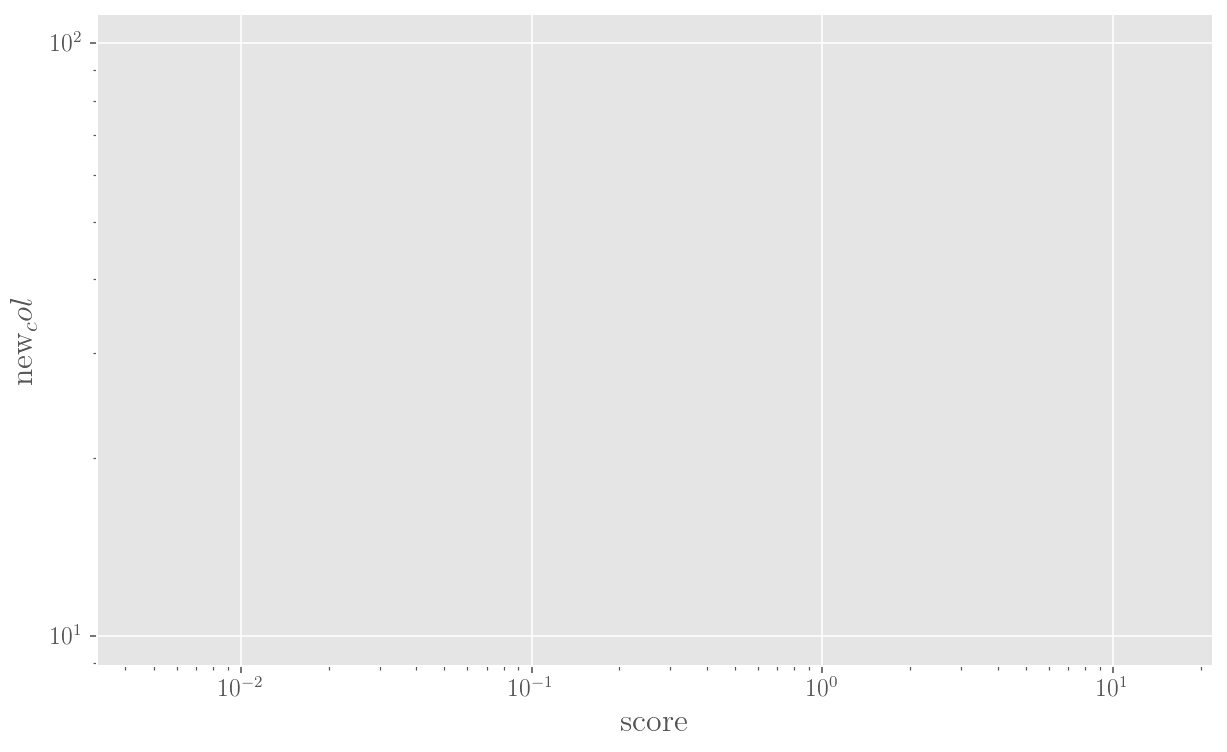

In [16]:
# Plotting directly from pandas
df.plot('score', 'new_col', kind='scatter', logx=True, logy=True)
plt.show();


# #two dataframes plots on same figure
# # ax = df_tmp.plot()
# # df2.plot(ax=ax)